In [2]:
from importlib import reload
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import subprocess
from glob import glob
from pkg import *
from pkg.functions import convert2int, convert2str, get_params
from typing import List, Dict, Any
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [3]:
datasets = [1, 4]

myPaths = path.PathManager(datasets=datasets)
myProcessor = process.Processor(paths=myPaths, datasets=datasets)
params = myProcessor.get_parameters()
print(params)
f.get_counts(paths=myPaths, datasets=datasets)

# myDatasetManager = data.DatasetManager(paths=myPaths, datasets=datasets)

# train_loader, test_loader = f.prepare(data_manager=myDatasetManager, batch_size=10)

Water backgrounds initialized: 0
{'01': {'clen': 0.15, 'photon_energy': 6000}, '04': {'clen': 0.25, 'photon_energy': 6000}}
Paths refreshed for dataset ['01', '04'].
Directory: peaks/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: labels/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks_water_overlay/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks/04
	Total files: 21
	Normal images: 14
	Empty images: 7
Directory: labels/04
	Total files: 35
	Normal images: 28
	Empty images: 7
Directory: peaks_water_overlay/04
	Total files: 35
	Normal images: 28
	Empty images: 7


In [4]:
f.check_attributes(paths=myPaths, datasets=f.convert2str(datasets), dir_type='peak')
print(myProcessor.get_parameters())

# f.retrieve_attributes(file_path=myPaths.total_paths.water_background[0])

c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00001.h5 conforms to expected attributes.
c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00001.h5:
Expected Peak: False, Actual Peak: False
c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00002.h5 conforms to expected attributes.
c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00002.h5:
Expected Peak: False, Actual Peak: False
c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00003.h5 conforms to expected attributes.
c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00003.h5:
Expected Peak: False, Actual Peak: False
c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00004.h5 conforms to expected attributes.
c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00004.h5:
Expected Peak: False, Actual Peak: False
c:\Users\ejsev\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00005.h5 conform

In [5]:
f.get_counts(paths=myPaths, datasets=datasets)
# %run process_directory.py ../../images  --percent_empty 0.5 

Paths refreshed for dataset ['01', '04'].
Directory: peaks/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: labels/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks_water_overlay/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks/04
	Total files: 21
	Normal images: 14
	Empty images: 7
Directory: labels/04
	Total files: 35
	Normal images: 28
	Empty images: 7
Directory: peaks_water_overlay/04
	Total files: 35
	Normal images: 28
	Empty images: 7


In [6]:
myDataManager = data.DatasetManager(paths=myPaths, datasets=datasets, transform=None)


train_loader, test_loader = f.prepare(data_manager=myDataManager, batch_size=10)

Actual percentage of empty images: 22.740524781341108% across peaks, water_overlays, and labels directories.

Final dataset sizes - Peaks: 79, Labels: 132, Overlays: 132

Data prepared.
Train size: 105
Test size: 27
Batch size: 10
Number of batches in train_loader: 11 



In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
optimizer = optim.Adam
scheduler = scheduler = ReduceLROnPlateau

cfg = {
    "loader": [train_loader, test_loader],
    'num_epochs': 15,
    'batch_size': train_loader.batch_size,
    'optimizer': optimizer,
    'device': device,
    'scheduler': scheduler
    }


peak_config = eval.Peak_Detection_Configuration(myPaths, datasets, device, save_path='../models/peak_model.pt')
print(peak_config.get_loss_weights())
photon_config = eval.Photon_Energy_Configuration(myPaths, datasets, device, save_path='../models/photon_model.pt')
print(photon_config.get_loss_weights())
clen_config = eval.Camera_Length_Configureation(myPaths, datasets, device, save_path='../models/clen_model.pt')
print(clen_config.get_loss_weights())

cuda
Paths refreshed for dataset ['01', '04'].
tensor([0.2453])
Paths refreshed for dataset ['01', '04'].
tensor([1.0000, 2.7714, 1.0000])
Paths refreshed for dataset ['01', '04'].
tensor([1.0000, 2.7714, 1.0000])


Model testing and validating: Multi_Class_CNN2
Looking for the feature: peak
-- epoch 0
Train loss: 8.847138369625265
Train accuracy: 0.5142857432365417
Test loss: 2.061885154247284
Test accuracy: 0.7037037014961243
-- learning rate : [0.0001]
-- epoch 1
Train loss: 4.843203869732943
Train accuracy: 0.6380952596664429
Test loss: 1.0829464197158813
Test accuracy: 0.8888888955116272
-- learning rate : [0.0001]
-- epoch 2
Train loss: 4.469131285494024
Train accuracy: 0.7333333492279053
Test loss: 2.7086089611053468
Test accuracy: 0.4444444477558136
-- learning rate : [0.0001]
-- epoch 3
Train loss: 4.891432136297226
Train accuracy: 0.6761904954910278
Test loss: 0.4977759480476379
Test accuracy: 0.7037037014961243
-- learning rate : [0.0001]
-- epoch 4
Train loss: 0.7778543369336561
Train accuracy: 0.5904762148857117
Test loss: 0.07914468720555305
Test accuracy: 0.6296296119689941
-- learning rate : [0.0001]
-- epoch 5
Train loss: 0.889868801038326
Train accuracy: 0.6476190686225891
Test l

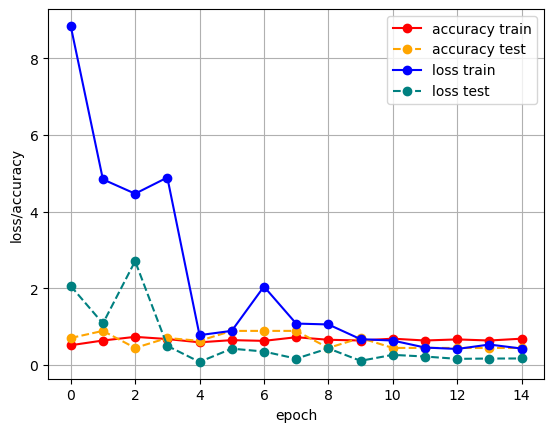

-- Labels      : [[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]]
-- Predictions : [[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


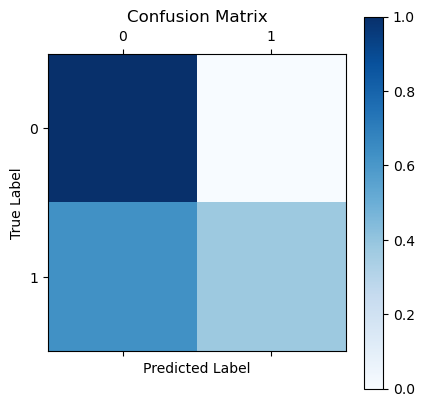

In [10]:
a = train_eval.TrainTestModels(cfg, peak_config)
a.epoch_loop()
a.plot_loss_accuracy()
a.plot_confusion_matrix()
a.get_confusion_matrix()
a.save_model()

Model testing and validating: Multi_Class_CNN1
Looking for the feature: photon_energy
-- epoch 0
Train loss: 0.39233193453401327
Train accuracy: 0.7142857313156128
Test loss: 0.00016708408074919134
Test accuracy: 1.0
-- learning rate : [1e-06]
-- epoch 1
Train loss: 0.00013302888809169582
Train accuracy: 1.0
Test loss: 2.0860772019659633e-05
Test accuracy: 1.0
-- learning rate : [1e-06]
-- epoch 2
Train loss: 2.2474201231177787e-05
Train accuracy: 1.0
Test loss: 1.0098899565491593e-05
Test accuracy: 1.0
-- learning rate : [1e-06]
-- epoch 3
Train loss: 1.3685225596304917e-05
Train accuracy: 1.0
Test loss: 7.754393755021738e-06
Test accuracy: 1.0
-- learning rate : [1e-06]
-- epoch 4
Train loss: 1.2909281808374958e-05
Train accuracy: 1.0
Test loss: 7.011719753791113e-06
Test accuracy: 1.0
-- learning rate : [1e-06]
-- epoch 5
Train loss: 1.1251188632079654e-05
Train accuracy: 1.0
Test loss: 6.756611583114136e-06
Test accuracy: 1.0
-- learning rate : [1e-06]
-- epoch 6
Train loss: 1.0311

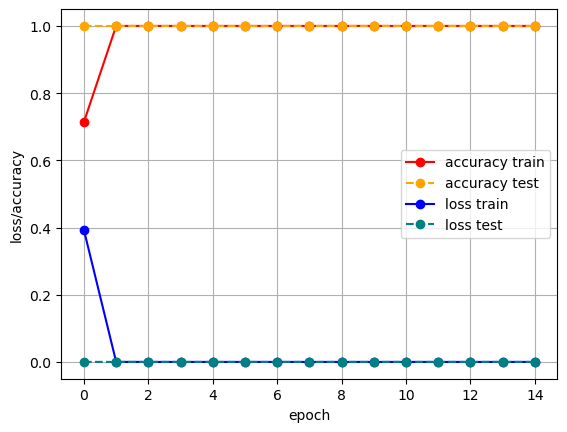

-- Labels      : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
-- Predictions : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


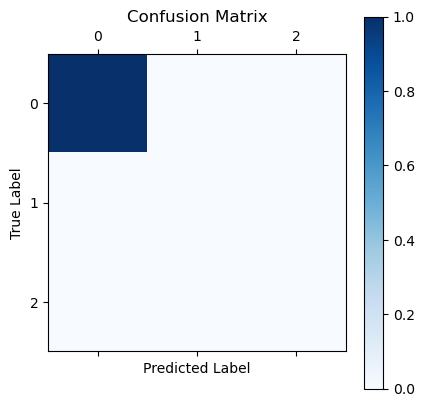

In [11]:
b = train_eval.TrainTestModels(cfg, photon_config)
b.epoch_loop()
b.plot_loss_accuracy()
b.plot_confusion_matrix()
b.get_confusion_matrix()
b.save_model()

Model testing and validating: Multi_Class_CNN1
Looking for the feature: clen
-- epoch 0
Train loss: 2.2623811851848257
Train accuracy: 0.5333333611488342
Test loss: 1.8283623218536378
Test accuracy: 0.29629629850387573
-- learning rate : [1e-05]
-- epoch 1
Train loss: 4.293145354498517
Train accuracy: 0.523809552192688
Test loss: 0.6361777573823929
Test accuracy: 0.7037037014961243
-- learning rate : [1e-05]
-- epoch 2
Train loss: 1.0887899284081703
Train accuracy: 0.800000011920929
Test loss: 0.015142074972391128
Test accuracy: 1.0
-- learning rate : [1e-05]
-- epoch 3
Train loss: 0.009913448909091212
Train accuracy: 1.0
Test loss: 0.0012549008293717633
Test accuracy: 1.0
-- learning rate : [1e-05]
-- epoch 4
Train loss: 0.0015338044134048025
Train accuracy: 1.0
Test loss: 6.25370375928469e-06
Test accuracy: 1.0
-- learning rate : [1e-05]
-- epoch 5
Train loss: 1.4334329948310783e-05
Train accuracy: 1.0
Test loss: 5.278373737382935e-06
Test accuracy: 1.0
-- learning rate : [1e-05]
-- 

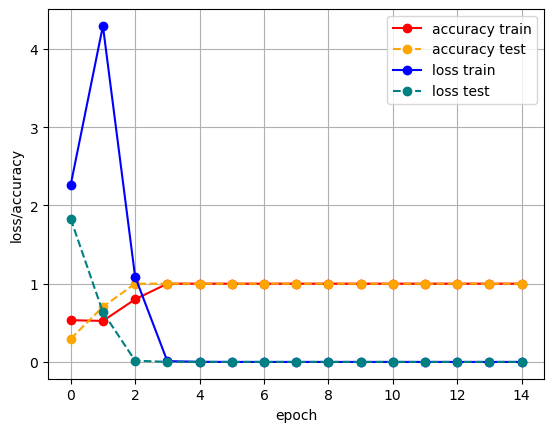

-- Labels      : [2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 2 2 2 1 1]
-- Predictions : [2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 2 2 2 1 1]


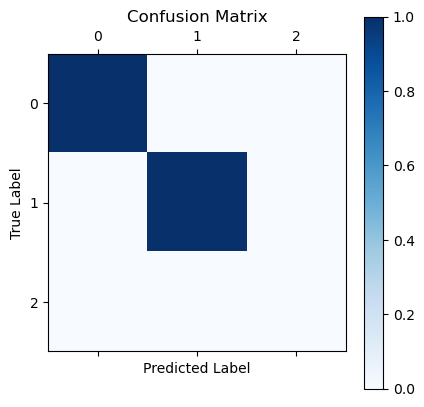

In [12]:
c = train_eval.TrainTestModels(cfg, clen_config)
c.epoch_loop()
c.plot_loss_accuracy()
c.plot_confusion_matrix()
c.get_confusion_matrix()
c.save_model()

In [8]:
# reload(pipe)
torch.cuda.synchronize()
torch.cuda.empty_cache()
pipeline = pipe.ModelPipeline(peak_config, photon_config, clen_config, device)

NameError: name 'background' is not defined

In [20]:
train_loader, test_loader = f.prepare(data_manager=myDataManager, batch_size=1)

for inputs, labels, attributes in train_loader:
    print(f'-- attributes: {attributes}')
    results = pipeline.run(inputs.to(device))
    print(f'-- results: {results}')
    break


Data prepared.
Train size: 105
Test size: 27
Batch size: 1
Number of batches in train_loader: 105 

-- attributes: {'clen': tensor([0.1500], dtype=torch.float64), 'peak': tensor([True]), 'photon_energy': tensor([6000])}


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [15]:
"""
How I want the pipeline to look.

cnn1_path = '../models/cnn1'
cnn2_path = '../models/cnn2'
cnn3_path = '../models/cnn3'

cnn1 = m.BasicCNN1()
cnn2 = m.BasicCNN2()
cnn3 = m.BasicCNN3()

pipeline = pipe.ModelPipeline(cnn1_path, cnn2_path, cnn3_path, cnn1, cnn2, cnn3)
pipeline.run(image)
pipeline.evaluate_results(image_path)
"""

"\nHow I want the pipeline to look.\n\ncnn1_path = '../models/cnn1'\ncnn2_path = '../models/cnn2'\ncnn3_path = '../models/cnn3'\n\ncnn1 = m.BasicCNN1()\ncnn2 = m.BasicCNN2()\ncnn3 = m.BasicCNN3()\n\npipeline = pipe.ModelPipeline(cnn1_path, cnn2_path, cnn3_path, cnn1, cnn2, cnn3)\npipeline.run(image)\npipeline.evaluate_results(image_path)\n"